# Limpieza

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
# Cargar dataset
df = pd.read_csv("../data/interim/df_1.csv")

In [12]:
df.columns = df.columns.str.replace(r'\.x$', '', regex=True)

## Valores nulos e imputación

In [14]:
# Revisión general de nulos
print("Valores nulos por columna:")
print(df.isnull().sum())

Valores nulos por columna:
Unnamed: 0                         0
user_id                            0
age                                0
income_range                       0
risk_profile                       0
occupation                         0
age_range_sturges                  0
primer_producto                    0
fecha_primer_producto              0
segundo_producto                  45
fecha_segundo_producto            45
dias_entre_productos              45
antiguedad_cliente                 0
checking_account                   0
savings_account                    0
credit_card                        0
insurance                          0
investment                         0
numero_productos                   0
combinacion_productos              0
entertainment_count                0
food_count                         0
health_count                       0
shopping_count                     0
supermarket_count                  0
transport_count                    0
travel_coun

### Se puede observar que segundo producto, fecha de contratación del segundo producto y dias entre la contratación del primero y segundo producto tienen 45 NA. Esto se debe al calculo que se hizo para obtenr los dias entre la contratación de uno y otro producto. Se va a 

In [15]:
columnas_con_nulos = df.columns[df.isnull().any()].tolist()
print("Columnas con valores nulos:")
print(df[columnas_con_nulos].isnull().sum())
print("\n")

# Análisis rápido de cada variable con nulos
for columna in columnas_con_nulos:
    print(f"--- {columna} ---")
    
    # Para variables numéricas
    if df[columna].dtype.kind in 'ifc':
        print("Estadísticas básicas:")
        print(df[columna].describe().round(2))
        
    # Para variables categóricas
    else:
        print("Valores más frecuentes:")
        print(df[columna].value_counts().head())
        
    print(f"Cantidad de valores únicos: {df[columna].nunique()}")
    print("\n")
    

Columnas con valores nulos:
segundo_producto          45
fecha_segundo_producto    45
dias_entre_productos      45
dtype: int64


--- segundo_producto ---
Valores más frecuentes:
segundo_producto
credit_card         21
insurance           12
savings_account     11
investment           7
checking_account     4
Name: count, dtype: int64
Cantidad de valores únicos: 5


--- fecha_segundo_producto ---
Valores más frecuentes:
fecha_segundo_producto
2022-12-01    3
2021-07-08    2
2021-10-16    1
2021-09-10    1
2022-11-28    1
Name: count, dtype: int64
Cantidad de valores únicos: 52


--- dias_entre_productos ---
Estadísticas básicas:
count     55.00
mean     340.22
std      221.07
min       30.00
25%      127.00
50%      346.00
75%      509.00
max      839.00
Name: dias_entre_productos, dtype: float64
Cantidad de valores únicos: 54




### Se observa que las variables son categorica, fecha y númerica. Por lo que se va a imputar con una un "none", una fecha dummy y un 0 respectivamente. Algo relevante mencionar es que el segndo producto más contratado es la tarjeta de crédito con 21 contrataciones. También se puede ver que la media para contratar otro producto es de 340 días y el minimo es de 30 días.

In [16]:
# Sustituir valores nulos en columnas relacionadas con la segunda contratación
df['segundo_producto'] = df['segundo_producto'].fillna('none')
df['fecha_segundo_producto'] = df['fecha_segundo_producto'].fillna('1900-01-01')  # Fecha dummy como marcador
df['dias_entre_productos'] = df['dias_entre_productos'].fillna(0)

In [17]:
# Verificar que ya no hay valores nulos en estas columnas
print("Verificación de nulos después de imputación:")
print(df[['segundo_producto', 'fecha_segundo_producto', 'dias_entre_productos']].isnull().sum())

# Ver distribución actualizada
print("\nDistribución de 'segundo_producto':")
print(df['segundo_producto'].value_counts(dropna=False).head())

print("\nDistribución de 'fecha_segundo_producto':")
print(df['fecha_segundo_producto'].value_counts(dropna=False).head())

print("\nEstadísticas de 'dias_entre_productos':")
print(df['dias_entre_productos'].describe().round(2))

# Verificar cuántos registros tienen los valores imputados
print(f"\nRegistros con 'segundo_producto' = 'none': {(df['segundo_producto'] == 'none').sum()}")
print(f"Registros con 'fecha_segundo_producto' = '1900-01-01': {(df['fecha_segundo_producto'] == '1900-01-01').sum()}")
print(f"Registros con 'dias_entre_productos' = 0: {(df['dias_entre_productos'] == 0).sum()}")

Verificación de nulos después de imputación:
segundo_producto          0
fecha_segundo_producto    0
dias_entre_productos      0
dtype: int64

Distribución de 'segundo_producto':
segundo_producto
none               45
credit_card        21
insurance          12
savings_account    11
investment          7
Name: count, dtype: int64

Distribución de 'fecha_segundo_producto':
fecha_segundo_producto
1900-01-01    45
2022-12-01     3
2021-07-08     2
2021-09-10     1
2022-11-28     1
Name: count, dtype: int64

Estadísticas de 'dias_entre_productos':
count    100.00
mean     187.12
std      235.78
min        0.00
25%        0.00
50%       48.50
75%      368.25
max      839.00
Name: dias_entre_productos, dtype: float64

Registros con 'segundo_producto' = 'none': 45
Registros con 'fecha_segundo_producto' = '1900-01-01': 45
Registros con 'dias_entre_productos' = 0: 45


In [18]:
print("Valores nulos después de imputación:")
print(df[['segundo_producto', 'fecha_segundo_producto', 'dias_entre_productos']].isnull().sum())

Valores nulos después de imputación:
segundo_producto          0
fecha_segundo_producto    0
dias_entre_productos      0
dtype: int64


## Outliers

In [19]:
# Revisión de outliers en columnas numéricas
numerical_cols = df.select_dtypes(include='number').columns

numerical_continuas = [
    col for col in numerical_cols
    if df[col].nunique() > 10 and not col.startswith("Unnamed")
]

print("\nEstadísticas de columnas numéricas continuas para detectar posibles outliers:")
print(df[numerical_continuas].describe())


Estadísticas de columnas numéricas continuas para detectar posibles outliers:
              age  dias_entre_productos  antiguedad_cliente  \
count  100.000000             100.00000          100.000000   
mean    43.390000             187.12000          999.410000   
std     15.283777             235.78334          254.623076   
min     18.000000               0.00000          379.000000   
25%     30.000000               0.00000          809.750000   
50%     45.000000              48.50000          997.000000   
75%     55.250000             368.25000         1194.750000   
max     70.000000             839.00000         1455.000000   

       total_transacciones  monto_promedio_transaccion  \
count           100.000000                  100.000000   
mean             10.000000                  152.458756   
std               3.038474                   78.841581   
min               4.000000                   44.616000   
25%               8.000000                   97.784042   
50%  

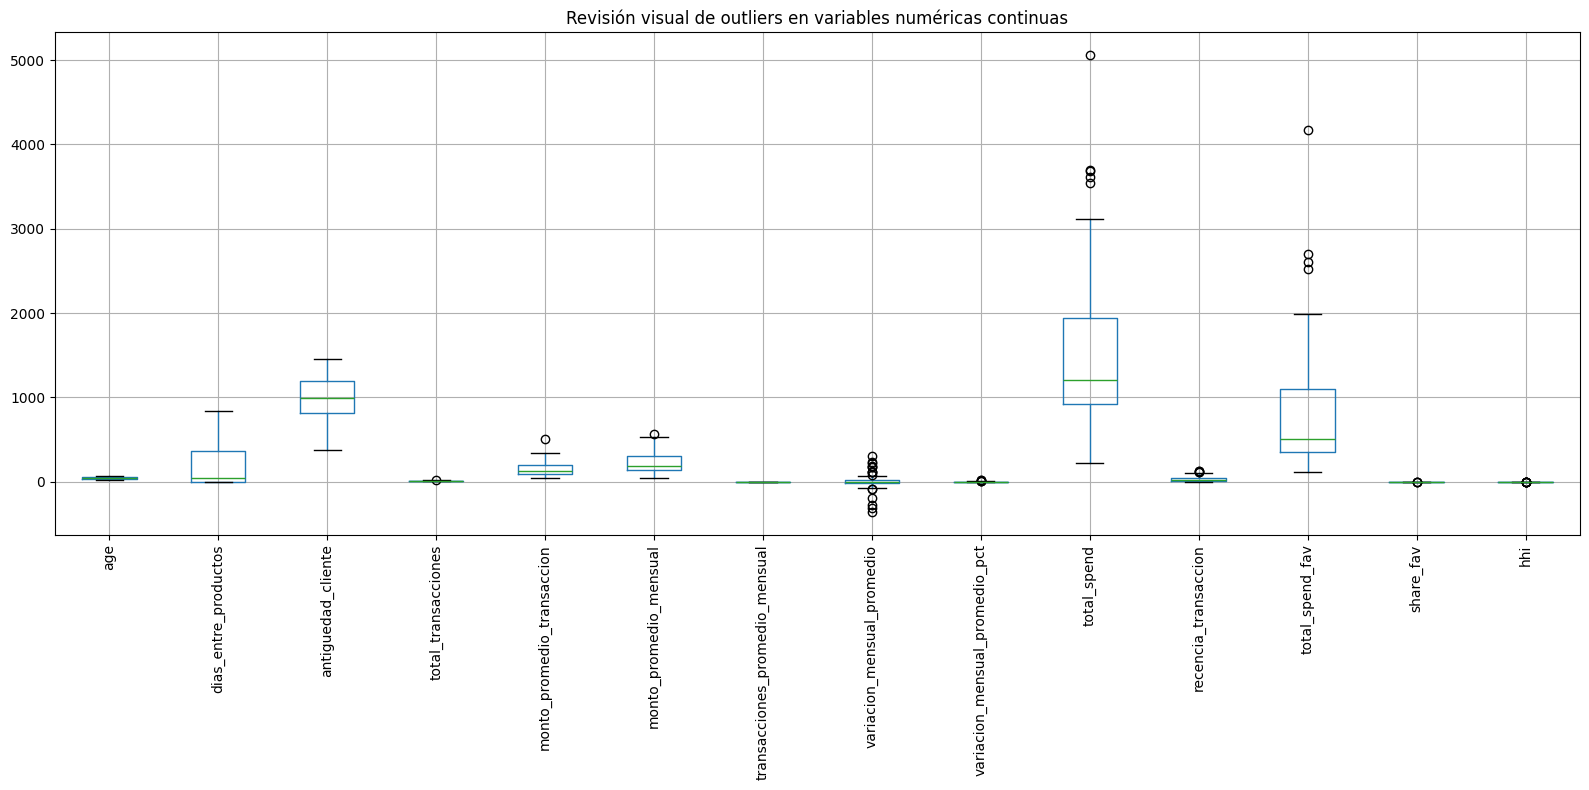

In [20]:
numerical_cols = df.select_dtypes(include='number').columns

numerical_continuas = [
    col for col in numerical_cols
    if df[col].nunique() > 10 and not col.startswith("Unnamed")
]

plt.figure(figsize=(16, 8))
df[numerical_continuas].boxplot(rot=90)
plt.title("Revisión visual de outliers en variables numéricas continuas")
plt.tight_layout()
plt.show()


#### Tratamiento de variables con outliers
Durante el análisis exploratorio se identificaron variables con valores atípicos significativos.
A continuación se detallan las acciones recomendadas para cada una:
1. total_spend_fav
Observación: Valores máximos superiores a 4,000, media cercana a 800.
Acción recomendada: Aplicar transformación logarítmica (np.log1p) para reducir la varianza y el impacto de valores extremos.
2. variacion_mensual_promedio
Observación: Rango amplio desde -356 hasta 306, con una media cercana a 2.6.
Acción recomendada: Aplicar winsorización entre los percentiles 1 y 99 para limitar la influencia de outliers sin eliminar información útil.
3. variacion_mensual_promedio_pct
Observación: Valores típicos entre 0 y 5, pero máximos de hasta 23.
Acción recomendada: Recortar al percentil 95 o aplicar log1p para suavizar su impacto.
4. recencia_transaccion
Observación: Valor máximo de 127 días, con la mayoría de los registros muy por debajo.
Acción recomendada: Estandarizar o agrupar por rangos (e.g., 0–30, 31–60, 61–90, +90) si se utiliza en modelos lineales.

Estas transformaciones mejorarán la estabilidad del modelo y reducirán el sesgo causado por valores extremos.

Aplicación a cada modelo:

Para Logistic Regression (modelo sensible a escala y outliers):
	•	✔️ Escala todas las numéricas continuas relevantes después de transformarlas.
	•	✔️ Aplica:
	•	log1p() a total_spend_fav y variacion_mensual_promedio_pct
	•	Winsoriza variacion_mensual_promedio
	•	Estandariza o categoriza recencia_transaccion
	•	❌ No escales binarias ni variables ya transformadas en dummies.

Para Random Forest:
	•	❌ No escales nada.
	•	✔️ Codifica las categóricas con LabelEncoder.
	•	🟡 Solo transforma (log1p() o winsoriza) si los outliers son muy dominantes.
	•	En tu caso podrías aplicar log1p() a total_spend_fav y dejar lo demás tal cual.

Para XGBoost:
	•	🟡 No es obligatorio escalar, pero:
	•	✔️ log1p() a total_spend_fav y variacion_mensual_promedio_pct
	•	✔️ Winsoriza variacion_mensual_promedio
	•	🟡 Estandariza recencia_transaccion si otras variables ya están escaladas
	•	Esto mejora la estabilidad del gradiente y la convergencia del modelo.

In [21]:
# Guardar dataset con variables generales
df.to_csv("../data/interim/df_clean_features.csv", index=False)